<a href="https://colab.research.google.com/github/WibowoAdiSaputro/tugas2_snsscrapetweet/blob/main/tugas2_snsscrapetweet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Langkah pertama sebelum kita melakukan klastering data pada twitter kita harus menginstall library snscrape. Kenapa library snscrape digunakan pada klastering kali ini karna mudah digunakan dan tidak perlu mengakses langsung Twitter API dengan access key atau token sehinggan tidak perlu menggunakan akun. 

In [2]:
!pip3 install snscrape


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Langkah Kedua menginstall Library Langdetect yang berfungsi mengimplementasi ulang pustaka deteksi bahasa Google ke Python

In [3]:
!pip install langdetect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 981 kB 4.6 MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993242 sha256=7d313b13cc2faae6f3028931efc9903f3f76ba53da85deace07d05db5a5d6d02
  Stored in directory: /root/.cache/pip/wheels/c5/96/8a/f90c59ed25d75e50a8c10a1b1c2d4c402e4dacfa87f3aff36a
Successfully built langdetect


langkah ketiga mengimport snscrape modul twitter dan json

In [4]:
import snscrape.modules.twitter as sntwitter
import json
from langdetect import detect

langkah ke empat menentukan sesuatu yang ingin di cari datanya, disini saya mencari data dengan kata kunci Persija dari tanggal 1 september sampai tanggal 3 oktober 2022 dengan batas maksimum tweet pencarian 100 tweet dan bahasa yang bisa di tampilkan dalam bahasa indonesia dan bahasa inggris

In [5]:
keywords=['Persija']
start="2022–09–01"
end ="2022–10–03"
max_num=100
fname='tweet.json' 
languages=['id','en']

langkah kelima mengimport library panda

In [6]:
import pandas as pd
datatw=[]

langkah ke enam melakukan proses scrapping tweet berdasarkan data yang sudah ada sebelumnya.

In [7]:
for keyword in keywords:
   
    for i, tweet in enumerate (sntwitter.TwitterSearchScraper(f'{keyword} ').get_items()):
        
        try:
            lan=detect(tweet.content)
        except:
            lan='error'
        if i == max_num:
            break
        if lan in languages:
            data = {'id': tweet.id, 'username':tweet.username, 'date': tweet.date, 'text': tweet.content,'url':tweet.url}
           # print(data)
            datatw.append(tweet.content)
            with open(fname, 'a+', encoding='utf-8') as f:
                line = json.dumps(data, ensure_ascii=False,default=str)
                #print(line)
                f.write(line)
                f.write('\n')

In [8]:
datatw

['@rinaldihadii @Persija_Jkt Yoi tanggal 2 November',
 '@bentargantinama @Persija_Jkt Ngupi mas',
 'Intip Kecanggihan Bus Operasional Terbaru Milik Persija Jakarta Bermesin Mercedes Benz https://t.co/PA0JUtVPxt',
 'Canggih! Intip Fasilitas Bus Baru Persija Jakarta Skylander R22 - https://t.co/G1Z8aE8UZD https://t.co/0WyF6nu6j9',
 'Persija Punya Bus Baru, Intip Kemewahan Fiturnya - https://t.co/nU6NHunyDB https://t.co/MMqf0echCe',
 'Jadwal Liga 1 Terbaru Akhirnya Keluar, Duel Persib Bandung vs Persija Dihadiri Penonton Terbatas https://t.co/4C4B7BIjyl',
 '@IeFarhad @Persija_Jkt @aniesbaswedan @ArizaPatria A hog a hog a hog',
 '@bhangantho @Persija_Jkt @aniesbaswedan @ArizaPatria YNTKTS https://t.co/ddUybT6w4K',
 '@Persija_Jkt Awas kena prank pssi 😂',
 '@itumenyehatkan @basyaridisini @Persija_Jkt @aniesbaswedan @ArizaPatria A hog siapa sih ?\nGa terkenal',
 '@manggip17 @Kentalmanis__ @keantod @agungpams03 @Persija_Jkt @aniesbaswedan @ArizaPatria Ga pernah ngerasain di PHPin si a hog kali

langkah ke tujuh menginstall library sastrawi, kenapa library sastrawi karena dapat mengubah kata imbuhan menjadi bentuk dasarnya

In [9]:
!pip install Sastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 209 kB 5.2 MB/s 


langkah ke delapan mengimport library, melakukan proses stemming, case folding dan filtering

In [10]:
import re
import string
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()# stemming process
# import StopWordRemoverFactory class
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
factory = StopWordRemoverFactory()
stopword = factory.create_stop_word_remover()
documents_clean=[]

for d in datatw:
    outputstem= stemmer.stem(d)
    d= stopword.remove(outputstem)
    # Remove Unicode
    document_test = re.sub(r'[^\x00-\x7F]+', ' ', d)
    # Remove Mentions
    document_test = re.sub(r'@\w+', '', document_test)
    # Lowercase the document
    document_test = document_test.lower()
    # Remove punctuations
    document_test = re.sub(r'[%s]' % re.escape(string.punctuation), ' ', document_test)
    # Lowercase the numbers
    document_test = re.sub(r'[0-9]', '', document_test)
    # Remove the doubled space
    outputstop = re.sub(r'\s{2,}', ' ', document_test)
    documents_clean.append(outputstop)

In [11]:
documents_clean[0:5]

['rinaldihadii persija jkt yoi tanggal november',
 'bentargantinama persija jkt ngupi mas',
 'intip canggih bus operasional baru milik persija jakarta mesin mercedes benz https t co pajutvpxt',
 'canggih intip fasilitas bus baru persija jakarta skylander r https t co gzaeuzd https t co wyfnuj',
 'persija punya bus baru intip mewah fiturnya https t co nunhunydb https t co mmqfechce']

langkah ke sembilan melakukan metode TfidfVectorizer untuk mempertimbangkan apakah data tersebut relevan/informatif terhadapa isi dokumen

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
tfidfvectorizer = TfidfVectorizer(analyzer='word')
tfidf_wm = tfidfvectorizer.fit_transform(documents_clean)
tfidf_tokens = tfidfvectorizer.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


langkah ke sepuluh mengimport library, melakukan metode CountVectorizer untuk menghitung frekuensi data dalam dokumen.

Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 20')

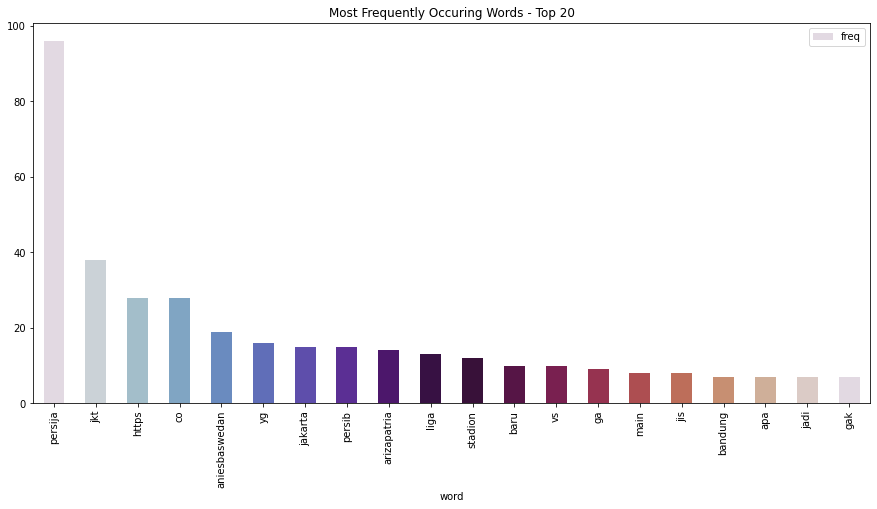

In [13]:
from sklearn.feature_extraction.text import CountVectorizer 
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
cv = CountVectorizer()
words = cv.fit_transform(documents_clean)
sum_words = words.sum(axis=0)


words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

color = plt.cm.twilight(np.linspace(0, 1, 20))
frequency.head(20).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = color)
plt.title("Most Frequently Occuring Words - Top 20")

langkah ke sebelas mengimport library k-means clustering 

In [14]:
from sklearn.cluster import KMeans
true_k = 3
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(words)

KMeans(max_iter=100, n_clusters=3, n_init=1)

langkah ke dua belas menampilkan hasil cluster 

In [15]:
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = cv.get_feature_names()

for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

print("\n")

Cluster 0:
 persija
 jkt
 co
 https
 aniesbaswedan
 yg
 arizapatria
 jakarta
 stadion
 liga
Cluster 1:
 wasit
 ferdy
 co
 persib
 persija
 luis
 siap
 rumi
 fix
 khusus
Cluster 2:
 bilang
 kpd
 tks
 abdi
 kamu
 aniesbaswedan
 persija
 persib
 apa
 arizapatria




/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


langkah ke tiga belas yaitu mencoba untuk memprediksi cluster kata berdasarkan model yang sudah dibuat

In [16]:
print("Prediction")
Y = cv.transform(["stadion"])
prediction = model.predict(Y)
print("Cluster number :", prediction)
Y = cv.transform(["jis"])
prediction = model.predict(Y)
print("Cluster number :", prediction)

Prediction
Cluster number : [0]
Cluster number : [0]


langkah ke empat belas menampilkan grafik dendogram dengan metode ward linkage

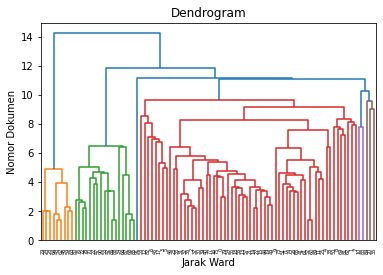

In [ ]:
import scipy.cluster.hierarchy as sch
X = cv.fit_transform(documents_clean).todense()
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward',metric='euclidean'),orientation="top")
plt.title('Dendrogram')
plt.xlabel('Jarak Ward')
plt.ylabel('Nomor Dokumen')
plt.show()

langkah ke lima belas menampilkan hasil dendogram dengan metode average linkage

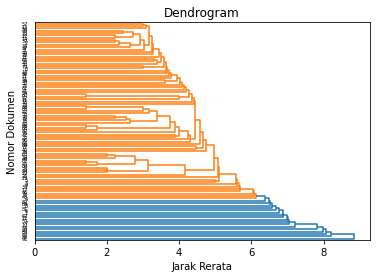

In [ ]:
import scipy.cluster.hierarchy as sch
X = cv.fit_transform(documents_clean).todense()
dendrogram = sch.dendrogram(sch.linkage(X, method = 'average',metric='euclidean'),orientation="right")
plt.title('Dendrogram')
plt.xlabel('Jarak Rerata')
plt.ylabel('Nomor Dokumen')
plt.show()

langkah ke enam belas menampilkan hasil dengan algoritma Agglomerative Clustering + prediksi clusternya

In [ ]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward')  
cluster.fit_predict(X) 
print(cluster.labels_)

[0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 1 0 0 0 4 0 0 5 4 4 0 0 0 0 5 1 0
 0 0 0 0 0 5 4 0 0 0 5 4 0 0 0 0 5 0 0 0 0 0 4 0 0 0 4 4 0 5 4 5 0 5 0 5 0
 0 0 5 0 5 0 5 0 0 2 1 5 5 5 5 0 5 3]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


langkah ke tujuh belas Menggabungkan Cluster + Menampilkan Dendrogram dengan orientasi "Top" dengan metode single linkage

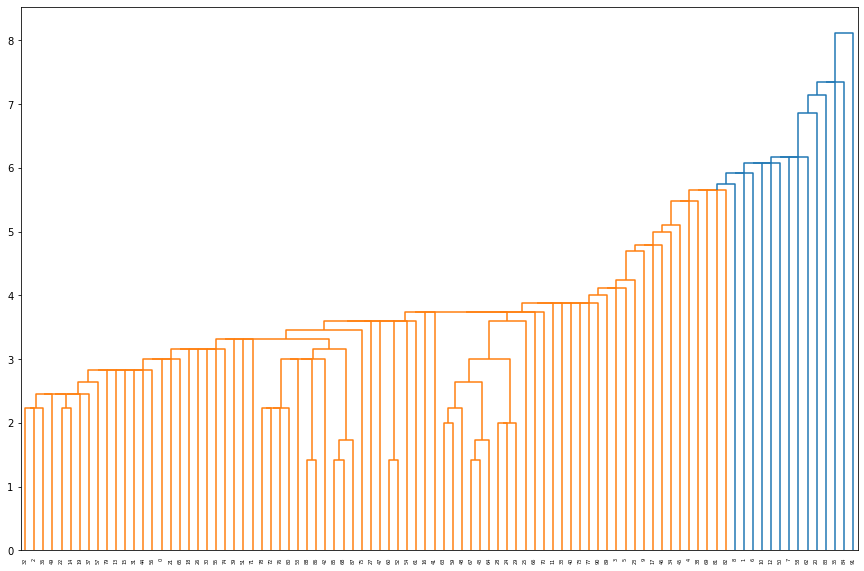

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

linked = linkage(X, 'single')

labelList = range(0, len(cluster.labels_))

plt.figure(figsize=(15, 10))
dendrogram(linked,
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()

langkah terakhir yaitu proses  HC (Agglomerative) + Prediksi Cluster-nya

In [ ]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='single')  
cluster.fit_predict(X) 
print(cluster.labels_)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 4 2 0 0 0 0 0 0 1]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
